**Create a KMeans clustering algorithm to group cutomers of a retail store based on their purchase history**

**Importing Important libraries**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Loading Dataset**

In [10]:
df=pd.read_csv('/content/Retail_Transactions_Dataset.csv')

In [62]:
#Top 5 rows of the Dataset

df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,21-12-2020 19:42,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,06-07-2020 07:45,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,02-10-2021 06:28,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,10-01-2022 05:39,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,13-10-2021 07:28,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None


In [63]:
#last 5 rows of the dataset

df.tail()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
29995,1000029995,16-10-2023 06:01,Candice Wilson,"['Butter', 'Tuna', 'Vinegar', 'Shower Gel', 'O...",7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items
29996,1000029996,08-04-2020 17:31,Jay Yu,['Honey'],8,5.84,Cash,Chicago,Pharmacy,True,Professional,Summer,Discount on Selected Items
29997,1000029997,18-12-2020 07:10,Larry Miller,"['Ironing Board', 'Toothbrush']",7,51.10,Credit Card,Los Angeles,Supermarket,True,Young Adult,Fall,Discount on Selected Items
29998,1000029998,28-02-2020 00:29,Jeremy Foster,"['Broom', 'Lawn Mower']",7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One)
29999,1000029999,22-11-2020 04:59,Devin Lawrence,"['Hair Gel', 'Mop', 'Peanut Butter']",9,12.04,Debit Card,Seattle,Specialty Store,False,Homemaker,Summer,None


In [64]:
#Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


**Finding Shape of our Dataset**

In [14]:
df.shape

(30000, 13)

In [65]:
#Finding null values in Dataset

df.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

In [66]:
#Overall statistic about Dataset

df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,3.000000e+04,30000.000000,30000.000000
mean,1.000015e+09,5.497800,52.504527
std,8.660398e+03,2.873686,27.363732
min,1.000000e+09,1.000000,5.000000
25%,1.000007e+09,3.000000,28.687500
50%,1.000015e+09,5.000000,52.480000
75%,1.000022e+09,8.000000,76.100000
max,1.000030e+09,10.000000,99.990000


In [67]:
#independent columns

df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

In [68]:
X=df[['Total_Cost','Total_Items']]

In [85]:
X

,Total_Cost,Total_Items
0,12.77,6
1,13.88,5
2,47.02,7
3,83.86,9
4,30.55,4
...,...,...
29995,31.74,7
29996,5.84,8
29997,51.10,7
29998,65.67,7


**KMeans clustering**

In [69]:
from sklearn.cluster import KMeans

In [70]:
k_means=KMeans()
k_means.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [71]:
k_means=KMeans(n_clusters=7)
k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 6, ..., 6, 2, 5], dtype=int32)

**Elbow method to find optimal number of clusters**

In [ ]:
wcss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i)
  k_means.fit(X)
  wcss.append(k_means.inertia_)


In [73]:
wcss

[22710199.350897547,
 5896457.107114056,
 2729580.3930011177,
 1657542.7797523083,
 1153044.3505791053,
 870178.8919146887,
 709755.4858102289,
 601112.5910275669,
 523866.5611262689,
 476883.2969604817]

In [74]:
import matplotlib.pyplot as plt


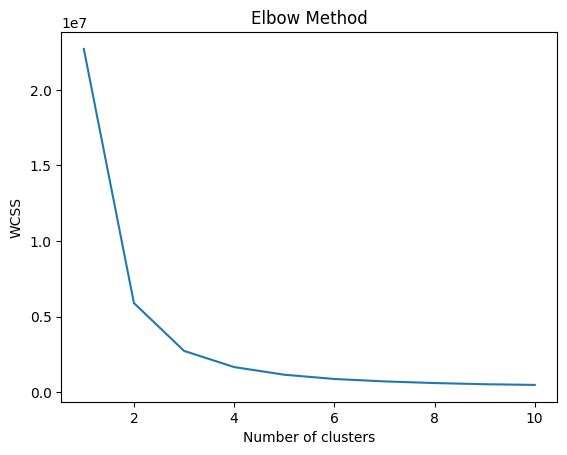

In [75]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**Model Training**

In [76]:
X=df[['Total_Cost','Total_Items']]

In [ ]:
k_means=KMeans(n_clusters=4,random_state=42)
y_means=k_means.fit_predict(X)

In [78]:
y_means

array([0, 0, 3, ..., 3, 2, 0], dtype=int32)

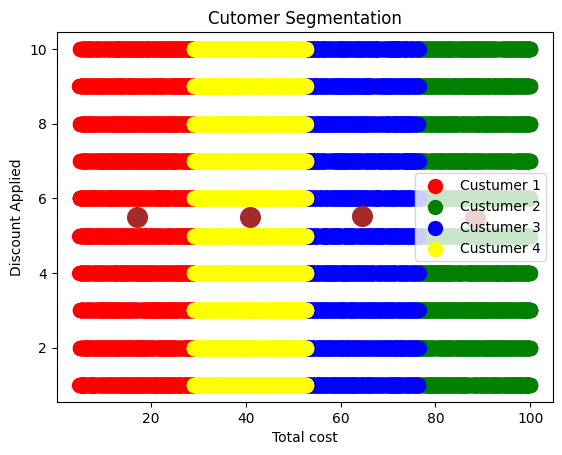

In [79]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="Custumer 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='green',label="Custumer 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='blue',label="Custumer 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='yellow',label="Custumer 4")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=200,c='brown')
plt.title("Cutomer Segmentation")
plt.xlabel("Total cost")
plt.ylabel("Discount Applied")
plt.legend()

In [86]:
k_means.predict([[30,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

**Save the model**

In [81]:
import joblib

In [82]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [83]:
model=joblib.load("customer_segmentation")

In [90]:
model.predict([[65,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)